<a href="https://colab.research.google.com/github/oteejay/tensorflow-hands-on/blob/main/03_computer_vision_intro_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we are working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101 

However we have modified it to only use two classes (pizza and steak) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what does not work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-09-04 10:30:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  43.1MB/s    in 2.4s    

2022-09-04 10:30:06 (43.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep  4 10:30 .
drwxr-xr-x 1 root root 4096 Sep  4 10:30 ..
drwxr-xr-x 4 root root 4096 Sep  4 10:30 test
drwxr-xr-x 4 root root 4096 Sep  4 10:30 train


In [7]:
# Another way to find out how many images are in a file
images_number = len(os.listdir("pizza_steak/train/steak"))

images_number

750

To visualize our images, first let's get the class names programmatically.

In [8]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['904938.jpg']
Image shape: (511, 512, 3)


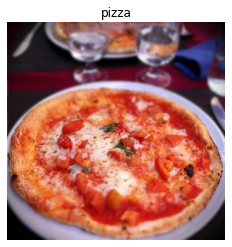

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
img

array([[[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [4, 0, 0]],

       [[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [3, 0, 0]],

       [[5, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [5, 1, 2],
        [4, 0, 1],
        [3, 0, 0]],

       ...,

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)

In [12]:
type(img)

numpy.ndarray

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(511, 512, 3), dtype=uint8, numpy=
array([[[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [4, 0, 0]],

       [[5, 0, 0],
        [5, 0, 0],
        [5, 0, 0],
        ...,
        [4, 0, 1],
        [4, 0, 1],
        [3, 0, 0]],

       [[5, 0, 0],
        [6, 0, 0],
        [6, 0, 0],
        ...,
        [5, 1, 2],
        [4, 0, 1],
        [3, 0, 0]],

       ...,

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)>

In [14]:
# Get all the pixel values between 0 and 1
img/255.0

array([[[0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.        , 0.        ]],

       [[0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        [0.01960784, 0.        , 0.        ],
        ...,
        [0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.        , 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       [[0.01960784, 0.        , 0.        ],
        [0.02352941, 0.        , 0.        ],
        [0.02352941, 0.        , 0.        ],
        ...,
        [0.01960784, 0.00392157, 0.00784314],
        [0.01568627, 0.        , 0.00392157],
        [0.01176471, 0.        , 0.        ]],

       ...,

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifially we need away to:

* Load our images
* Preporocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Proprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary", 
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history1 = model1.fit(train_data, 
                      epochs=5,
                      steps_per_epoch=len(train_data), 
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 227ms/step - loss: 0.5650 - accuracy: 0.7080 - val_loss: 0.3984 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4141 - accuracy: 0.8127 - val_loss: 0.4124 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3801 - accuracy: 0.8333 - val_loss: 0.3589 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3609 - accuracy: 0.8427 - val_loss: 0.3222 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3339 - accuracy: 0.8647 - val_loss: 0.3684 - val_accuracy: 0.8500


> 🔑 **Node:** If the above cell is taking longer than 10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [16]:
# Epoch 1/5
# 47/47 [==============================] - 110s 2s/step - loss: 0.5399 - accuracy: 0.7320 - val_loss: 0.4366 - val_accuracy: 0.7940

In [17]:
len(train_data)

47

In [18]:
1500/32

46.875

🛠 **Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs. https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we have built in a previous section to see if it works with our image data. 

The model we are building is from the TensorFlow playground.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2 = model2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 1.1240 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Get a summary of model2
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Despite having about 20x more parameters than our CNN (model1), model2 performs terribly... let's try to improve it.

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the mdoel (same as above but let's step it up a notch)
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history3 = model3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 152ms/step - loss: 4.2592 - accuracy: 0.5853
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.8892 - accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.5717 - accuracy: 0.7573
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6558 - accuracy: 0.7433
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4841 - accuracy: 0.7753


In [23]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think the more the better. And in lots of cases, it is. But in this case, the difference here is the two differnt styles of model we are using. Where a series of dense layers has a number of different learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

## Binary Classification: Let's break it down

1. Beome one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with a batch_size)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3011642.jpg']
Image shape: (384, 512, 3)
['1287004.jpg']
Image shape: (512, 512, 3)


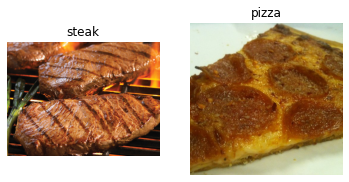

In [24]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look all ~10,000 images at a time, a model might only look at 32 at a time. 

I does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [26]:
!nvidia-smi

Sun Sep  4 10:32:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    30W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [28]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                              target_size=(224, 224), # target size of images (height, width)
                                              class_mode="binary", # type of data you are working with
                                              batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
test_dir

'pizza_steak/test'

In [30]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [31]:
# How many batches are there?
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.14901961, 0.13725491],
          ...,
          [0.08627451, 0.07843138, 0.09803922],
          [0.09803922, 0.09019608, 0.10980393],
          [0.09411766, 0.08627451, 0.10588236]],
 
         [[0.18039216, 0.15294118, 0.12941177],
          [0.18823531, 0.16078432, 0.13725491],
          [0.1764706 , 0.14509805, 0.13333334],
          ...,
          [0.07450981, 0.06666667, 0.08627451],
          [0.08627451, 0.07843138, 0.09803922],
          [0.08235294, 0.07450981, 0.09411766]],
 
         [[0.16470589, 0.12941177, 0.10980393],
          [0.19215688, 0.15686275, 0.13725491],
          [0.17254902, 0.13725491, 0.11764707],
          ...,
          [0.08235294, 0.07450981, 0.09411766],
          [0.09019608, 0.08235294, 0.10196079],
          [0.09411766, 0.08627451, 0.10588236]],
 
         ...,
 
         [[0.12941177, 0.1137255 , 0.10980393],
          [0.11764

In [34]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best the field for your problem).

In [35]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [36]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [37]:
# Compile the model
model4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [38]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [39]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [40]:
# Fit the model
history4 = model4.fit(train_data, # this is a combiantion of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 1.3891 - accuracy: 0.6473 - val_loss: 0.4921 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4801 - accuracy: 0.7833 - val_loss: 0.4153 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3930 - accuracy: 0.8460 - val_loss: 0.3790 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.2595 - accuracy: 0.9080 - val_loss: 0.3652 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.1082 - accuracy: 0.9673 - val_loss: 0.4671 - val_accuracy: 0.8100


In [41]:
model1.evaluate(test_data)

16/16 [==============================] - 2s 149ms/step - loss: 0.3684 - accuracy: 0.8500


[0.3683970868587494, 0.8500000238418579]

### 5. Evaluating our model

It looks like our model is learning sometime let's evaluate it

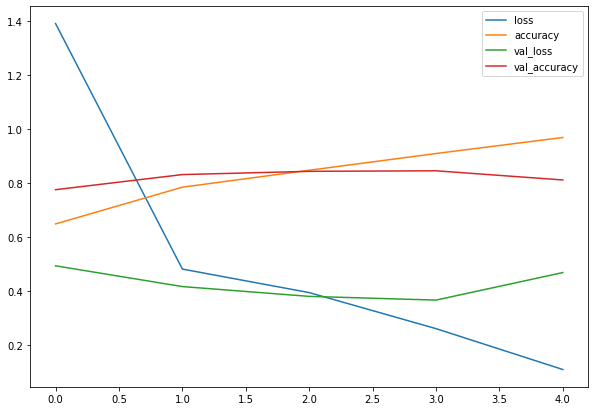

In [42]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10, 7))

In [43]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss cureves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **Note:** When a model's **validation loss starts to increase**, it is likely that the model is **overfitting** the training dataset. This means it is learning the patterns in the training data *too well* and thus the model's ability to generalize to unseen data will be dimished.

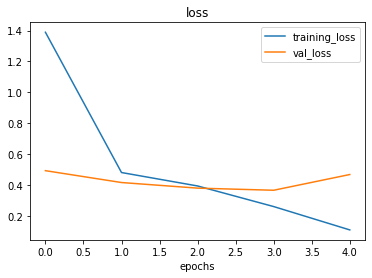

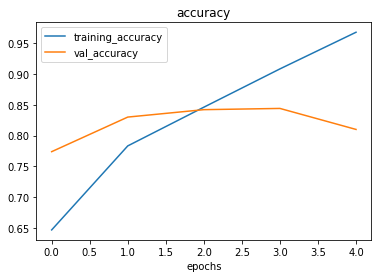

In [44]:
# Check out the loss and accuracy of model4
plot_loss_curves(history4)

from tensorflow.python.util import lazy_loader
### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our plattened lazy_loader

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**

In [45]:
# Create the model (this is going to be our new baseline)
model5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [46]:
# Compile the model
model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [47]:
# Fit the model
history5 = model5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6379 - accuracy: 0.6340 - val_loss: 0.4866 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4966 - accuracy: 0.7620 - val_loss: 0.4164 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4553 - accuracy: 0.8087 - val_loss: 0.3765 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4425 - accuracy: 0.8013 - val_loss: 0.3673 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3920 - accuracy: 0.8380 - val_loss: 0.3545 - val_accuracy: 0.8340


In [48]:
# Get a summary of our model with max pooling
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

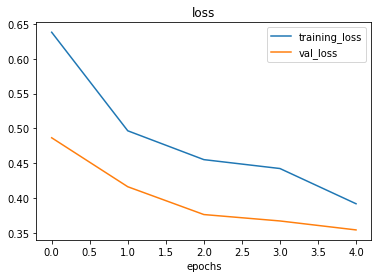

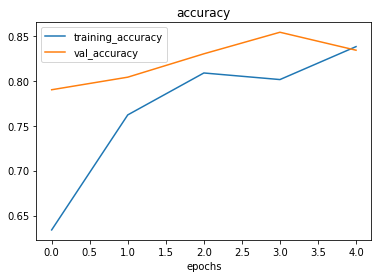

In [49]:
# Plot loss curves
plot_loss_curves(history5)

### Opening our bag of tricks and find data augmentation

In [50]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [51]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.

Finally... let's visualize some augmented data!!!

In [52]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented... only data (images)

showing image number: 17


(-0.5, 223.5, 223.5, -0.5)

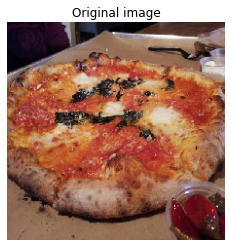

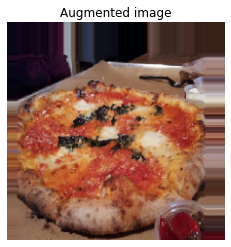

In [53]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we have seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [54]:
# Create a model (same as model5)
model6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history6 = model6.fit(train_data_augmented, # fitting model6 on augmented training data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 551ms/step - loss: 0.6976 - accuracy: 0.5540 - val_loss: 0.6863 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 25s 524ms/step - loss: 0.7088 - accuracy: 0.4800 - val_loss: 0.6707 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6818 - accuracy: 0.5993 - val_loss: 0.6420 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6481 - accuracy: 0.6693 - val_loss: 0.6158 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 31s 664ms/step - loss: 0.6954 - accuracy: 0.5233 - val_loss: 0.6333 - val_accuracy: 0.6960


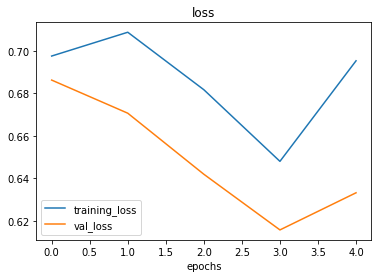

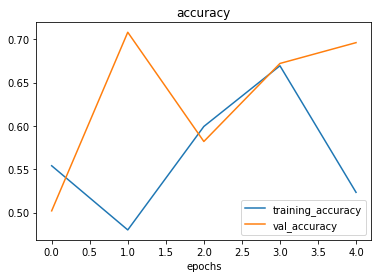

In [55]:
# Check our models training curves
plot_loss_curves(history6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens


In [56]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model5 and model6)
model7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history7 = model7.fit(train_data_augmented_shuffled, # we are fitting on augmented and shuffled data now
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6411 - accuracy: 0.6220 - val_loss: 0.5193 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5499 - accuracy: 0.7173 - val_loss: 0.4314 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 26s 559ms/step - loss: 0.5153 - accuracy: 0.7453 - val_loss: 0.4530 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5119 - accuracy: 0.7400 - val_loss: 0.3740 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.4641 - accuracy: 0.7913 - val_loss: 0.3671 - val_accuracy: 0.8360


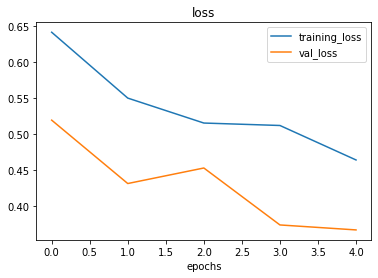

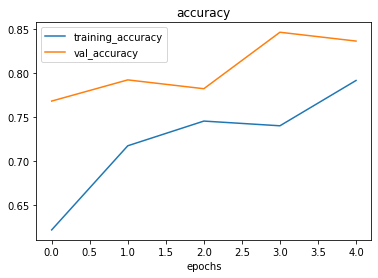

In [58]:
# Plot loss curves
plot_loss_curves(history7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [59]:
# Classes we were working with
print(class_names)

['pizza' 'steak']


--2022-09-04 10:39:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-09-04 10:39:33 (85.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



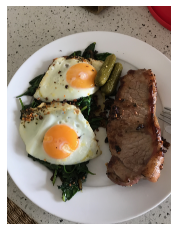

In [60]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [61]:
steak.shape

(4032, 3024, 3)

In [62]:
steak_expanded = tf.expand_dims(steak, axis=0)
steak_expanded.shape

TensorShape([1, 4032, 3024, 3])

In [64]:
model7.predict(steak_expanded)

ValueError: ignored

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [65]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.0
  return img

In [66]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [67]:
steak = tf.expand_dims(steak, axis=0)
pred_prob = model7.predict(steak)

In [68]:
steak.shape

TensorShape([1, 224, 224, 3])

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, would not it be nice if we could visualize the image as well as the model's prediction?

In [69]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred_prob))]
pred_class

'steak'

In [71]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

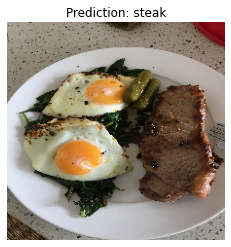

In [72]:
pred_and_plot(model7, "03-steak.jpeg")

Our model works! Let's try it on another image... this is pizza 

In [73]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-09-04 10:40:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-09-04 10:40:07 (76.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



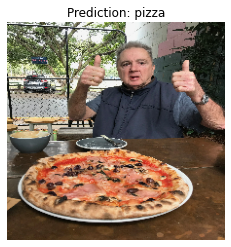

In [74]:
pred_and_plot(model7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We have just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we are going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make it works)
5. Evaluate the model
6. Adjust the different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [76]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-04 10:56:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   180MB/s    in 2.8s    

2022-09-04 10:56:30 (180 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [77]:
import os
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'")

There are 2 directories and 0 image in '10_food_classes_all_data'
There are 10 directories and 0 image in '10_food_classes_all_data/test'
There are 0 directories and 250 image in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 image in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 image in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 image in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 image in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 image in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 image in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 image in '10_food_classes_all_data/test/hamburger'
There are 10 directories and 0 ima

In [78]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [81]:
# Let's get the subdirectories (these are our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1270258.jpg']
Image shape: (512, 512, 3)


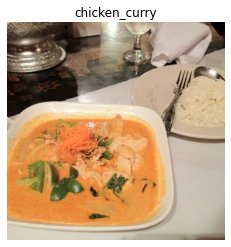

In [85]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We have been talking a lot about the [CNN explainer website](https://poloclub.github.io/cnn-explainer/)... how about we just take their model (also on 10 classes) and use it for our problem...?

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer)
model8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 neurons and use the softmax activation function
])

# Compile the model
model8.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

### 4. Fit the model

In [91]:
# Fit the model
history8 = model8.fit(train_data, # now 10 different classes
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 216ms/step - loss: 2.2317 - accuracy: 0.1627 - val_loss: 2.1419 - val_accuracy: 0.2252
Epoch 2/5
235/235 [==============================] - 55s 234ms/step - loss: 1.9801 - accuracy: 0.3055 - val_loss: 2.1250 - val_accuracy: 0.2544
Epoch 3/5
235/235 [==============================] - 52s 223ms/step - loss: 1.5446 - accuracy: 0.4749 - val_loss: 2.0603 - val_accuracy: 0.2928
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 0.9016 - accuracy: 0.7067 - val_loss: 2.7820 - val_accuracy: 0.2592
Epoch 5/5
235/235 [==============================] - 50s 215ms/step - loss: 0.3539 - accuracy: 0.8901 - val_loss: 3.8276 - val_accuracy: 0.2528


### 5. Evaluate the model

In [92]:
# Evaluate on the test data
model8.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 3.8276 - accuracy: 0.2528


[3.8275551795959473, 0.25279998779296875]

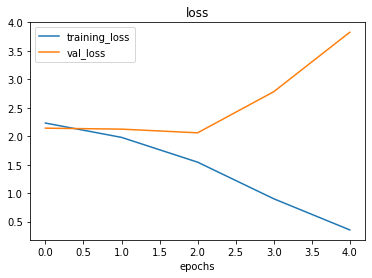

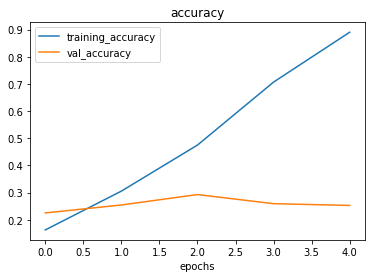

In [93]:
# Check out the model's loss cureves on the 10 classes
plot_loss_curves(history8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it is getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce the number of layers or reduce the number of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [96]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model9.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [98]:
# Fit the model with 2x conv layers removed
history9 = model9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1329 - accuracy: 0.2591 - val_loss: 2.0376 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 47s 200ms/step - loss: 1.7753 - accuracy: 0.3931 - val_loss: 1.8617 - val_accuracy: 0.3588
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.3717 - accuracy: 0.5479 - val_loss: 2.0283 - val_accuracy: 0.3316
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 0.9198 - accuracy: 0.7129 - val_loss: 2.1962 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.5095 - accuracy: 0.8564 - val_loss: 2.6137 - val_accuracy: 0.2960


In [97]:
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [94]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

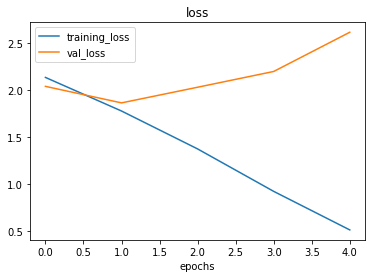

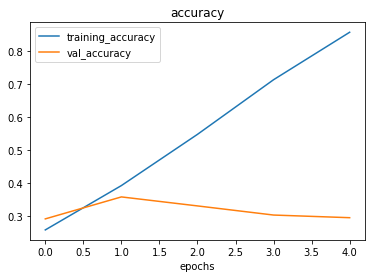

In [99]:
# Check out the loss curves of model9
plot_loss_curves(history9)

In [100]:
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validatio loss curves closer)
* Improve validation accuracy

In [101]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [103]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model10 = tf.keras.models.clone_model(model8)

# Compile the cloned model (using the same setup as previous models)
model10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [104]:
# Fit the model
history10 = model10.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 533ms/step - loss: 2.2645 - accuracy: 0.1413 - val_loss: 2.1115 - val_accuracy: 0.2268
Epoch 2/5
235/235 [==============================] - 122s 519ms/step - loss: 2.1045 - accuracy: 0.2395 - val_loss: 1.9933 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 120s 509ms/step - loss: 2.0324 - accuracy: 0.2809 - val_loss: 1.9312 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 121s 514ms/step - loss: 1.9786 - accuracy: 0.3089 - val_loss: 1.8529 - val_accuracy: 0.3656
Epoch 5/5
235/235 [==============================] - 121s 513ms/step - loss: 1.9532 - accuracy: 0.3199 - val_loss: 1.8777 - val_accuracy: 0.3480


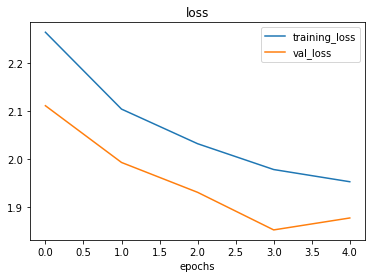

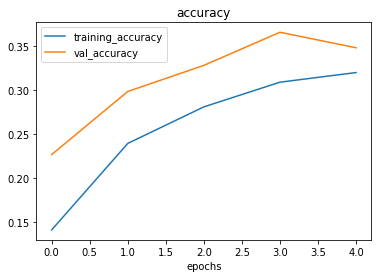

In [106]:
# Let's plot the lost curves for the augmented data
plot_loss_curves(history10)

In [107]:
model10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here.. continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjus the hyperparameter in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictoins on our custom images!

In [109]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [110]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wgethttps://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-09-04 12:57:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-09-04 12:57:57 (119 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2022-09-04 12:57:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

In [111]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

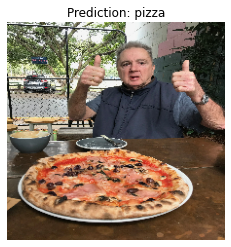

In [114]:
# Make a prediction using model10
pred_and_plot(model=model10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

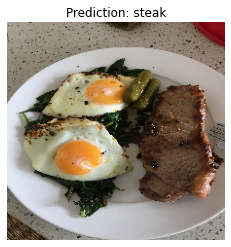

In [115]:
pred_and_plot(model=model10,
              filename="03-steak.jpeg",
              class_names=class_names)

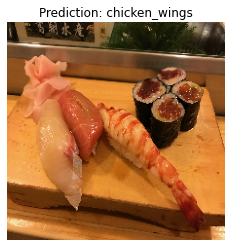

In [116]:
pred_and_plot(model=model10,
              filename="03-sushi.jpeg",
              class_names=class_names)

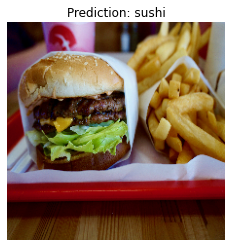

In [121]:
pred_and_plot(model=model10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~34% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [123]:
# Save a model
model10.save("saved_trained_model_10")

In [125]:
# Load in a trained model and evaluate it
loaded_model10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model10.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 1.8777 - accuracy: 0.3480


[1.8777439594268799, 0.3479999899864197]

In [126]:
# Compare our loaded model to our existing model
model10.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.8777 - accuracy: 0.3480


[1.877744197845459, 0.3479999899864197]